In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
import graphufs
plt.style.use("graphufs.plotstyle")

In [4]:
from config import GEFSTrainer as Emulator

In [5]:
from graphufs.datasets import Dataset

In [8]:
class MSETrainer(Emulator):
    possible_stacked_dims = ("batch", "lat", "lon", "channels")
    @property
    def input_dims(self):
        return {
            "time": self.n_input,
            "member": 1,
            "lat": len(self.latitude),
            "lon": len(self.longitude),
            "level": len(self.pressure_levels),
        }

    @property
    def input_overlap(self):
        return dict()


In [9]:
dev = Emulator()
mse = MSETrainer()

Skipping normalization
Skipping normalization


In [28]:
from xbatcher import BatchGenerator
class DropMemberDataset(Dataset):
    possible_stacked_dims = ("batch", "lat", "lon", "channels")
    def __init__(
        self,
        emulator,
        mode,
        preload_batch=False,
        input_chunks=None,
        target_chunks=None,
    ):
        super().__init__(emulator,mode,preload_batch,input_chunks,target_chunks)

        xds = self._open_dataset()

        input_dims = emulator.input_dims.copy()
        input_dims["member"] = 1
        input_overlap = emulator.input_overlap.copy()
        input_overlap.pop("member")
        
        self.sample_generator = BatchGenerator(
            ds=xds,
            input_dims=input_dims,
            input_overlap=input_overlap,
            preload_batch=preload_batch
        )

        
        

In [10]:
tds = Dataset(dev, mode="training")

In [11]:
mds = Dataset(mse, mode="training")

In [12]:
s = tds.sample_generator[1]
sa = mds.sample_generator[1]

In [13]:
len(tds)

24

In [14]:
len(mds)

32

In [17]:
s

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 1, fhr: 2, member: 2, level: 3, lat: 179, lon: 360)
Coordinates:
  * fhr        (fhr) int64 16B 0 6
  * lat        (lat) float64 1kB 89.0 88.0 87.0 86.0 ... -86.0 -87.0 -88.0 -89.0
    lead_time  (fhr) timedelta64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * member     (member) int64 16B 1 2
  * level      (level) float64 24B 100.0 500.0 1e+03
  * time       (time) datetime64[ns] 8B 2017-01-01
    datetime   (time, fhr) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Data variables:
    u          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    sh2        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    t2m        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    t          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    v10        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    orog       (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    w          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    u10        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    lsm        (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    q          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    v          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    sp         (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>

In [18]:
sa

<xarray.Dataset> Size: 11MB
Dimensions:    (time: 1, fhr: 2, member: 1, level: 3, lat: 179, lon: 360)
Coordinates:
  * fhr        (fhr) int64 16B 0 6
  * lat        (lat) float64 1kB 89.0 88.0 87.0 86.0 ... -86.0 -87.0 -88.0 -89.0
    lead_time  (fhr) timedelta64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * member     (member) int64 8B 1
  * level      (level) float64 24B 100.0 500.0 1e+03
  * time       (time) datetime64[ns] 8B 2017-01-01
    datetime   (time, fhr) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Data variables:
    u          (time, fhr, member, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    sh2        (time, fhr, member, lat, lon) float32 516kB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    t2m        (time, fhr, member, lat, lon) float32 516kB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    t          (time, fhr, member, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    v10        (time, fhr, member, lat, lon) float32 516kB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    orog       (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    w          (time, fhr, member, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    u10        (time, fhr, member, lat, lon) float32 516kB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    lsm        (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    q          (time, fhr, member, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    v          (time, fhr, member, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    sp         (time, fhr, member, lat, lon) float32 516kB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>

In [20]:
x,y = tds[0]
x1,y1 = tds[1]
x2,y2 = tds[2]
x3,y3 = tds[3]

print(x.shape, y.shape)

(1, 2, 179, 360, 32) (1, 2, 179, 360, 20)


In [25]:
x,y = mds[10]
x1,y1 = mds[11]
x2,y2 = mds[12]
x3,y3 = mds[13]

print(x.shape, y.shape)

(1, 179, 360, 32) (1, 179, 360, 20)


In [26]:
inputs = xr.concat([x,x1,x2,x3], dim="batch").rename({"batch": "sample"})
targets = xr.concat([y,y1,y2,y3], dim="batch").rename({"batch": "sample"})

In [27]:
targets

<xarray.DataArray (sample: 4, lat: 179, lon: 360, channels: 20)> Size: 21MB
dask.array<concatenate, shape=(4, 179, 360, 20), dtype=float32, chunksize=(1, 179, 360, 1), chunktype=numpy.ndarray>
Coordinates:
  * sample   (sample) int64 32B 10 11 12 13
  * lat      (lat) float64 1kB 89.0 88.0 87.0 86.0 ... -86.0 -87.0 -88.0 -89.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: channels
Attributes: (12/32)
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  181
    GRIB_cfName:                              specific_humidity
    GRIB_cfVarName:                           q
    GRIB_dataType:                            cf
    ...                                       ...
    GRIB_units:                               kg kg**-1
    GRIB_uvRelativeToGrid:                    0
    long_name:                                Specific humidity
    standard_name:                            specific_humidity
    units:                                    kg kg**-1
    transformation:                           this variable shows log(q)

In [58]:
length = len(inputs.sample) * len(inputs.member)

In [59]:
length

8

In [64]:
idx = 2
getmulti = lambda ii: (ii//2, ii%2)

for i in range(8):
    print(getmulti(i))

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(3, 0)
(3, 1)


In [48]:
inputs

<xarray.DataArray (sample: 4, batch: 4, member: 2, lat: 179, lon: 360,
                   channels: 32)> Size: 264MB
dask.array<concatenate, shape=(4, 4, 2, 179, 360, 32), dtype=float32, chunksize=(1, 4, 1, 90, 360, 5), chunktype=numpy.ndarray>
Coordinates:
  * batch    (batch) int64 32B 0 1 2 3
  * lat      (lat) float64 1kB 89.0 88.0 87.0 86.0 ... -86.0 -87.0 -88.0 -89.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * member   (member) int64 16B 0 1
Dimensions without coordinates: sample, channels

In [43]:
x,y = mds[1]
print(x.shape, y.shape)

(1, 179, 360, 32) (1, 179, 360, 20)


In [11]:
sample = tds.sample_generator[2]
sample.squeeze()

<xarray.Dataset> Size: 11MB
Dimensions:    (fhr: 2, lat: 179, lon: 360, level: 3)
Coordinates:
  * fhr        (fhr) int64 16B 0 6
  * lat        (lat) float64 1kB 89.0 88.0 87.0 86.0 ... -86.0 -87.0 -88.0 -89.0
    lead_time  (fhr) timedelta64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    member     int64 8B 2
  * level      (level) float64 24B 100.0 500.0 1e+03
    time       datetime64[ns] 8B 2017-01-01
    datetime   (fhr) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
Data variables:
    sh2        (fhr, lat, lon) float32 516kB dask.array<chunksize=(1, 179, 360), meta=np.ndarray>
    v          (fhr, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 179, 360), meta=np.ndarray>
    v10        (fhr, lat, lon) float32 516kB dask.array<chunksize=(1, 179, 360), meta=np.ndarray>
    orog       (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    u          (fhr, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 179, 360), meta=np.ndarray>
    t          (fhr, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 179, 360), meta=np.ndarray>
    u10        (fhr, lat, lon) float32 516kB dask.array<chunksize=(1, 179, 360), meta=np.ndarray>
    lsm        (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    sp         (fhr, lat, lon) float32 516kB dask.array<chunksize=(1, 179, 360), meta=np.ndarray>
    t2m        (fhr, lat, lon) float32 516kB dask.array<chunksize=(1, 179, 360), meta=np.ndarray>
    w          (fhr, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 179, 360), meta=np.ndarray>
    q          (fhr, level, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 179, 360), meta=np.ndarray>

In [12]:
i,t,f = gufs.extract_inputs_targets_forcings(sample, keep_member_id=True)

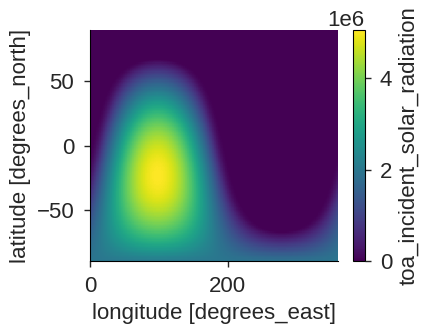

In [13]:
f.toa_incident_solar_radiation.plot()

In [14]:
x,y = tds[1]
print(x.shape, y.shape)

(1, 1, 179, 360, 32) (1, 1, 179, 360, 20)


In [12]:
from graphufs.batchloader import BatchLoader

/home/tsmith/work/graph-ufs/graphufs/mpi.py:13: UserWarning: graphufs.mpi: Unable to import mpi4py or mpi4jax, cannot use this module
  warnings.warn(f"graphufs.mpi: Unable to import mpi4py or mpi4jax, cannot use this module")


In [13]:
loader = BatchLoader(
    tds,
    batch_size=4,
    shuffle=True,
    drop_last=True,
)
                     

In [14]:
x,y = loader.get_data()

In [15]:
x.shape

(4, 2, 179, 360, 32)

In [16]:
y.shape

(4, 2, 179, 360, 20)

In [15]:
import xarray as xr
component = "mean" # see also: "stddev", "diffs_stddev"
ds = xr.open_zarr(
    f"gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.statistics.1993-2019/{component}_by_level.zarr",
    storage_options={"token": "anon"},
)

In [8]:
from graphcast import data_utils

In [10]:
yp = data_utils.get_year_progress(
    sample.datetime.data.astype("datetime64[s]").astype(int),
)

In [13]:
yp.shape

(2, 2)

In [14]:
data_utils.featurize_progress(
    name="yp",
    dims=sample.datetime.dims,
    progress=yp,
)

{'yp': <xarray.Variable (t0: 2, fhr: 2)> Size: 16B
 array([[0.00168948, 0.00237396],
        [0.00237396, 0.00305844]], dtype=float32),
 'yp_sin': <xarray.Variable (t0: 2, fhr: 2)> Size: 16B
 array([[0.01061513, 0.01491547],
        [0.01491547, 0.01921554]], dtype=float32),
 'yp_cos': <xarray.Variable (t0: 2, fhr: 2)> Size: 16B
 array([[0.9999437 , 0.9998888 ],
        [0.9998888 , 0.99981534]], dtype=float32)}

In [11]:
data_utils.add_derived_vars(sample)

In [12]:
sample

<xarray.Dataset> Size: 35MB
Dimensions:            (t0: 2, fhr: 2, member: 2, level: 3, lat: 181, lon: 360)
Coordinates:
  * fhr                (fhr) int64 16B 0 6
  * lat                (lat) float64 1kB 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
    lead_time          (fhr) timedelta64[ns] 16B 00:00:00 06:00:00
  * lon                (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * member             (member) int64 16B 0 1
  * level              (level) float64 24B 500.0 800.0 1e+03
  * t0                 (t0) datetime64[ns] 16B 2017-01-01 2017-01-01T06:00:00
    datetime           (t0, fhr) datetime64[ns] 32B 2017-01-01 ... 2017-01-01...
Data variables: (12/15)
    q                  (t0, fhr, member, level, lat, lon) float32 6MB dask.array<chunksize=(1, 1, 1, 1, 181, 360), meta=np.ndarray>
    t                  (t0, fhr, member, level, lat, lon) float32 6MB dask.array<chunksize=(1, 1, 1, 1, 181, 360), meta=np.ndarray>
    u                  (t0, fhr, member, level, lat, lon) float32 6MB dask.array<chunksize=(1, 1, 1, 1, 181, 360), meta=np.ndarray>
    v10                (t0, fhr, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t2m                (t0, fhr, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    u10                (t0, fhr, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    ...                 ...
    year_progress      (t0, fhr) float32 16B 0.001689 0.002374 0.002374 0.003058
    year_progress_sin  (t0, fhr) float32 16B 0.01062 0.01492 0.01492 0.01922
    year_progress_cos  (t0, fhr) float32 16B 0.9999 0.9999 0.9999 0.9998
    day_progress       (t0, fhr, lon) float32 6kB 0.0 0.002778 ... 0.4944 0.4972
    day_progress_sin   (t0, fhr, lon) float32 6kB 0.0 0.01745 ... 0.0349 0.01745
    day_progress_cos   (t0, fhr, lon) float32 6kB 1.0 0.9998 ... -0.9994 -0.9998

In [14]:
targets = xx.sel(fhr=[6]).squeeze(dim="fhr")

In [11]:
targets

<xarray.Dataset> Size: 27MB
Dimensions:     (datetime: 3, member: 2, lat: 181, lon: 360, level: 3)
Coordinates:
    fhr         int64 8B 6
  * lat         (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
    lead_time   timedelta64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
  * lon         (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * member      (member) int64 16B 0 1
  * level       (level) float64 24B 500.0 800.0 1e+03
  * datetime    (datetime) datetime64[ns] 24B 2017-01-01 ... 2017-01-01T12:00:00
    valid_time  (datetime) datetime64[ns] 24B dask.array<chunksize=(3,), meta=np.ndarray>
Data variables:
    v10         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    v           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    u10         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    sh2         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    q           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t2m         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    sp          (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    u           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>